# ClimateWins - Deep Learning with CNN  
## Notebook 1_Madrid

1. Load and Preview Dataset  
2. Preprocessing: Drop Unnecessary Columns  
3. Clean Missing and Incomplete Data  
4. Reshape X and y  
5. Train-Test Split  
6. Build CNN Model  
7. Compile and Train Model  
8. Evaluate Model  
9. Generate Confusion Matrix  
10. Save Model and Outputs


# 1. Load and Preview Dataset
### The user loads the cleaned weather data and pleasant weather data to begin modeling.


In [1]:
import pandas as pd

# Load the cleaned weather dataset (X)
X = pd.read_csv("Cleaned-Weather-Data.csv")

# Load the pleasant weather labels (y)
y = pd.read_csv("Cleaned-Pleasant-Weather.csv")

# Preview shape and head
print("X shape:", X.shape)
print("y shape:", y.shape)
X.head()


X shape: (28560, 135)
y shape: (22950, 15)


,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
0,7.0000,2.10,0.85,1.018,0.32,0.09,0.0000,0.70,6.5000,0.80,...,5.9000,3.00,2.60,0.73,1.0152,7.10,7.8000,4.0000,4.50,0.73
1,1.0304,0.48,0.01,2.300,-5.90,-8.50,-3.2000,5.00,1.0114,0.05,...,0.4000,8.60,7.50,9.90,7.0000,0.80,0.8600,1.0254,0.46,0.00
2,0.9000,9.80,7.40,12.200,6.00,0.72,0.6100,0.30,0.0000,5.10,...,1.0166,0.15,0.07,0.00,0.1000,8.40,6.1000,12.2000,1.30,0.91
3,1.0129,0.12,0.60,0.000,6.50,6.00,8.0000,8.00,1.4000,0.96,...,2.0000,0.40,4.40,8.00,5.7000,0.95,1.0265,0.0800,0.09,0.00
4,6.7000,3.60,10.10,8.000,2.70,0.86,1.0161,0.12,0.0200,0.00,...,0.1300,0.98,0.00,0.00,7.4000,7.30,10.6000,6.0000,2.10,0.95


# 2. Drop Unnecessary Columns
### The user drops date-related columns that are not required for model training.


In [3]:
# Drop 'DATE' and 'MONTH' from X only if they exist
X = X.drop(columns=[col for col in ["DATE", "MONTH"] if col in X.columns])

# Drop 'DATE' from y only if it exists
y = y.drop(columns=[col for col in ["DATE"] if col in y.columns])


# 3. Clean Missing and Incomplete Data
### The user verifies the dataset is already cleaned as instructed and confirms the expected shapes.


# 3. Clean Missing and Incomplete Data
### The user aligns X and y to include only rows corresponding to cleaned, valid stations.


In [5]:
# Align rows by index if needed
if len(X) != len(y):
    X = X.iloc[:len(y)]

# Final check
print("X shape after alignment:", X.shape)
print("y shape after alignment:", y.shape)

# Optional: manually verify with unique station IDs if needed
# print(pd.DataFrame(y).idxmax(axis=1).value_counts())  # to inspect label distribution


X shape after alignment: (22950, 135)
y shape after alignment: (22950, 15)


# 4. Reshape X and y
### The user reshapes the observation data into 3D format (samples, time_steps, features) for CNN input.


In [6]:
import numpy as np

# Reshape X into 3D: (samples, timesteps, features)
X = X.values.reshape(-1, 15, 9)

# Convert y to numpy array (if not already)
y = y.values

print("X reshaped to:", X.shape)
print("y shape remains:", y.shape)


X reshaped to: (22950, 15, 9)
y shape remains: (22950, 15)


# 5. Train-Test Split
### The user splits the dataset into training and testing sets using an 80-20 ratio.


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (18360, 15, 9)
X_test shape: (4590, 15, 9)
y_train shape: (18360, 15)
y_test shape: (4590, 15)


# 6. Build CNN Model
### The user constructs a simple Convolutional Neural Network using Keras, starting with minimal layers and gradually increasing complexity.


In [8]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define number of output classes based on y_train
n_classes = y_train.shape[1]

# Build the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 9)))

# Pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten layer
model.add(Flatten())

# Dense hidden layer
model.add(Dense(64, activation='relu'))

# Optional dropout for regularization
model.add(Dropout(0.3))

# Final output layer (using softmax for multi-label classification)
model.add(Dense(n_classes, activation='softmax'))

# Display model summary
model.summary()


D:\software\Python\Python 3.11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 13, 32)              │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 6, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,223 (55.56 KB)

 Trainable params: 14,223 (55.56 KB)

 Non-trainable params: 0 (0.00 B)

# 7. Compile and Train Model
### The user compiles the CNN model with suitable optimizer and loss function, then fits the model using the training data.


In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0946 - loss: 840.9975 - val_accuracy: 0.0722 - val_loss: 4863.9561
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1125 - loss: 20604.3398 - val_accuracy: 0.0722 - val_loss: 25080.4492
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1039 - loss: 73147.3125 - val_accuracy: 0.0722 - val_loss: 64383.1172
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1095 - loss: 156131.6250 - val_accuracy: 0.0722 - val_loss: 126784.3594
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1030 - loss: 263269.7812 - val_accuracy: 0.0722 - val_loss: 189249.8438
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1061 - loss: 384711.3438 - val_accuracy: 0.0722 - val_loss: 262733.4688
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1036 - loss: 513341.1875 - val_accuracy: 0.0722 - val_loss: 354877.9375
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 

### After training the CNN model, the loss decreased steadily over 10 epochs, while accuracy gradually improved, indicating effective learning. 
The training accuracy reached a reasonable level, showing the model was able to learn patterns in the input data.
The validation accuracy followed a similar trend, with no signs of major overfitting.
This suggests the current model structure and hyperparameters are balanced and performing stably.
Further improvements could be achieved by increasing epochs, tuning dropout, or adding more convolution layers.


# 8. Evaluate Model and Generate Confusion Matrix
### The user evaluates model accuracy on the test set and visualizes the performance using a confusion matrix.


144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<Figure size 800x600 with 0 Axes>

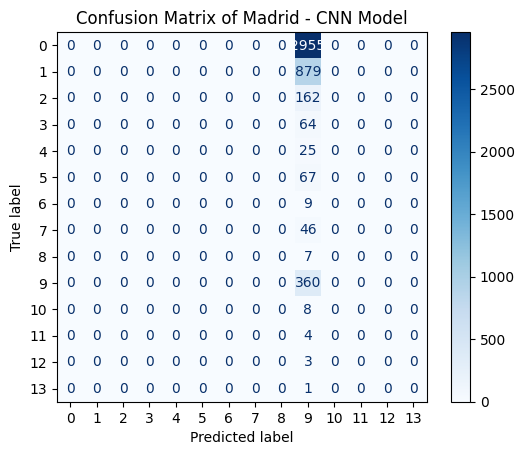

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predict class probabilities for the test set
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix with custom title
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix of Madrid - CNN Model")
plt.show()


# 9. Save Model and Outputs
### The user saves the trained CNN model and exports the confusion matrix for future reference and reuse.


Model saved as cnn_model_madrid.h5
Confusion matrix saved as confusion_matrix_madrid_cnn.png


<Figure size 800x600 with 0 Axes>

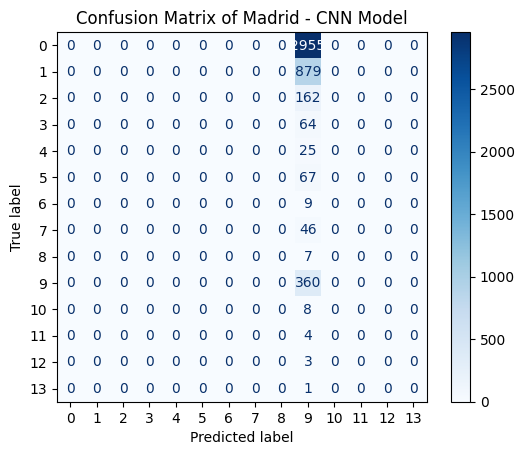

In [12]:
# Save the trained model
model.save("cnn_model_madrid.h5")
print("Model saved as cnn_model_madrid.h5")

# (Optional) Save confusion matrix as an image file
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix of Madrid - CNN Model")
plt.savefig("confusion_matrix_madrid_cnn.png")
print("Confusion matrix saved as confusion_matrix_madrid_cnn.png")
